In [1]:
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
All_Accuracy = []
Epochs = 10

In [3]:
def delta_time(start_time):
    now_time = time.time()
    print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(now_time - start_time)))

In [4]:
trainData = datasets.FashionMNIST("F_MNIST_data", train=True, download=True, transform=ToTensor())

trainLoader = DataLoader(dataset=trainData, batch_size = 10, shuffle = True, pin_memory=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 18043116.18it/s]


Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266031.61it/s]


Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5011208.46it/s]


Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9783541.91it/s]

Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
def run_model(model, Loss, optimizer):
    start_time = time.time()
    accuracy = []
    for epoch in range(Epochs):
        running_loss = 0.0
        running_corrects = 0.0

        for inputs, labels in trainLoader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = Loss(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(trainLoader.dataset)
        epoch_acc = running_corrects.double() / len(trainLoader.dataset)
        accuracy.append(epoch_acc.item())
        print('Epoch [{}/{}], Loss: {:.4f}, Acc: {:.4f}'.format(epoch+1, Epochs, epoch_loss, epoch_acc))

    delta_time(start_time)
    return accuracy

In [7]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 28),
            nn.ReLU(),
            nn.Linear(28, 28),
            nn.ReLU(),
            nn.Linear(28,10),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

In [8]:
def create_structure(model, optimizer):
    Loss = nn.CrossEntropyLoss()
    acc = run_model(model, Loss, optimizer)
    return acc

#Models

In [9]:
model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.6261, Acc: 0.7724
Epoch [2/10], Loss: 0.5026, Acc: 0.8225
Epoch [3/10], Loss: 0.4726, Acc: 0.8323
Epoch [4/10], Loss: 0.4588, Acc: 0.8373
Epoch [5/10], Loss: 0.4473, Acc: 0.8427
Epoch [6/10], Loss: 0.4324, Acc: 0.8460
Epoch [7/10], Loss: 0.4254, Acc: 0.8497
Epoch [8/10], Loss: 0.4221, Acc: 0.8517
Epoch [9/10], Loss: 0.4159, Acc: 0.8545
Epoch [10/10], Loss: 0.4142, Acc: 0.8542
Execution time: 00:03:00


In [10]:
model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.6756, Acc: 0.4239
Epoch [2/10], Loss: 0.9603, Acc: 0.6486
Epoch [3/10], Loss: 0.8068, Acc: 0.7093
Epoch [4/10], Loss: 0.7454, Acc: 0.7264
Epoch [5/10], Loss: 0.7138, Acc: 0.7359
Epoch [6/10], Loss: 0.6922, Acc: 0.7413
Epoch [7/10], Loss: 0.6757, Acc: 0.7463
Epoch [8/10], Loss: 0.6624, Acc: 0.7518
Epoch [9/10], Loss: 0.6520, Acc: 0.7557
Epoch [10/10], Loss: 0.6435, Acc: 0.7580
Execution time: 00:03:00


In [11]:
model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.7740, Acc: 0.7480
Epoch [2/10], Loss: 0.4520, Acc: 0.8377
Epoch [3/10], Loss: 0.4150, Acc: 0.8483
Epoch [4/10], Loss: 0.3974, Acc: 0.8544
Epoch [5/10], Loss: 0.3825, Acc: 0.8604
Epoch [6/10], Loss: 0.3702, Acc: 0.8652
Epoch [7/10], Loss: 0.3617, Acc: 0.8679
Epoch [8/10], Loss: 0.3550, Acc: 0.8701
Epoch [9/10], Loss: 0.3469, Acc: 0.8737
Epoch [10/10], Loss: 0.3437, Acc: 0.8744
Execution time: 00:02:59


In [12]:
model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.2)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.7945, Acc: 0.7215
Epoch [2/10], Loss: 0.4678, Acc: 0.8324
Epoch [3/10], Loss: 0.4200, Acc: 0.8478
Epoch [4/10], Loss: 0.3938, Acc: 0.8583
Epoch [5/10], Loss: 0.3752, Acc: 0.8646
Epoch [6/10], Loss: 0.3613, Acc: 0.8683
Epoch [7/10], Loss: 0.3481, Acc: 0.8739
Epoch [8/10], Loss: 0.3391, Acc: 0.8767
Epoch [9/10], Loss: 0.3298, Acc: 0.8793
Epoch [10/10], Loss: 0.3216, Acc: 0.8814
Execution time: 00:03:00


In [13]:
model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.55)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.3915, Acc: 0.4987
Epoch [2/10], Loss: 1.2423, Acc: 0.5270
Epoch [3/10], Loss: 1.2097, Acc: 0.5345
Epoch [4/10], Loss: 1.1913, Acc: 0.5389
Epoch [5/10], Loss: 1.0224, Acc: 0.6104
Epoch [6/10], Loss: 0.9504, Acc: 0.6396
Epoch [7/10], Loss: 0.8825, Acc: 0.6739
Epoch [8/10], Loss: 0.7837, Acc: 0.7181
Epoch [9/10], Loss: 0.7693, Acc: 0.7211
Epoch [10/10], Loss: 0.7609, Acc: 0.7229
Execution time: 00:03:00


In [14]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.5860, Acc: 0.4403
Epoch [2/10], Loss: 1.5296, Acc: 0.4573
Epoch [3/10], Loss: 1.5255, Acc: 0.4594
Epoch [4/10], Loss: 1.5194, Acc: 0.4607
Epoch [5/10], Loss: 1.5127, Acc: 0.4635
Epoch [6/10], Loss: 1.5182, Acc: 0.4625
Epoch [7/10], Loss: 1.5123, Acc: 0.4640
Epoch [8/10], Loss: 1.5128, Acc: 0.4632
Epoch [9/10], Loss: 1.5100, Acc: 0.4641
Epoch [10/10], Loss: 1.5015, Acc: 0.4648
Execution time: 00:03:14


In [15]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 2.3028, Acc: 0.1001
Epoch [2/10], Loss: 2.3026, Acc: 0.1000
Epoch [3/10], Loss: 2.3026, Acc: 0.1000
Epoch [4/10], Loss: 2.3026, Acc: 0.1000
Epoch [5/10], Loss: 2.3026, Acc: 0.1000
Epoch [6/10], Loss: 2.3026, Acc: 0.1000
Epoch [7/10], Loss: 2.3026, Acc: 0.1000
Epoch [8/10], Loss: 2.3026, Acc: 0.1000
Epoch [9/10], Loss: 2.3026, Acc: 0.1000
Epoch [10/10], Loss: 2.3026, Acc: 0.1000
Execution time: 00:03:15


In [16]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.007)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.3687, Acc: 0.4828
Epoch [2/10], Loss: 0.9618, Acc: 0.6574
Epoch [3/10], Loss: 0.8852, Acc: 0.6855
Epoch [4/10], Loss: 0.8655, Acc: 0.6924
Epoch [5/10], Loss: 0.8604, Acc: 0.6933
Epoch [6/10], Loss: 0.8720, Acc: 0.6932
Epoch [7/10], Loss: 0.8591, Acc: 0.6949
Epoch [8/10], Loss: 0.8542, Acc: 0.6947
Epoch [9/10], Loss: 0.8471, Acc: 0.6979
Epoch [10/10], Loss: 0.8442, Acc: 0.6970
Execution time: 00:03:14


In [17]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.4770, Acc: 0.4658
Epoch [2/10], Loss: 1.3996, Acc: 0.4785
Epoch [3/10], Loss: 1.3789, Acc: 0.4802
Epoch [4/10], Loss: 1.3390, Acc: 0.4921
Epoch [5/10], Loss: 1.2140, Acc: 0.5340
Epoch [6/10], Loss: 1.1969, Acc: 0.5376
Epoch [7/10], Loss: 1.1880, Acc: 0.5388
Epoch [8/10], Loss: 1.1824, Acc: 0.5396
Epoch [9/10], Loss: 1.1765, Acc: 0.5413
Epoch [10/10], Loss: 1.1704, Acc: 0.5421
Execution time: 00:03:14


In [18]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.1411, Acc: 0.6268
Epoch [2/10], Loss: 1.0568, Acc: 0.6640
Epoch [3/10], Loss: 1.0371, Acc: 0.6729
Epoch [4/10], Loss: 1.0257, Acc: 0.6762
Epoch [5/10], Loss: 1.0180, Acc: 0.6785
Epoch [6/10], Loss: 1.0120, Acc: 0.6807
Epoch [7/10], Loss: 1.0072, Acc: 0.6816
Epoch [8/10], Loss: 1.0035, Acc: 0.6833
Epoch [9/10], Loss: 0.9999, Acc: 0.6837
Epoch [10/10], Loss: 0.9968, Acc: 0.6848
Execution time: 00:03:08


In [19]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.08)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 2.3030, Acc: 0.1000
Epoch [2/10], Loss: 2.3026, Acc: 0.1000
Epoch [3/10], Loss: 2.3026, Acc: 0.1000
Epoch [4/10], Loss: 2.3026, Acc: 0.1000
Epoch [5/10], Loss: 2.3026, Acc: 0.1000
Epoch [6/10], Loss: 2.3026, Acc: 0.1000
Epoch [7/10], Loss: 2.3026, Acc: 0.1000
Epoch [8/10], Loss: 2.3026, Acc: 0.1000
Epoch [9/10], Loss: 2.3026, Acc: 0.1000
Epoch [10/10], Loss: 2.3026, Acc: 0.1000
Execution time: 00:03:09


In [20]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.12)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 2.3059, Acc: 0.1000
Epoch [2/10], Loss: 2.3026, Acc: 0.1000
Epoch [3/10], Loss: 2.3026, Acc: 0.1000
Epoch [4/10], Loss: 2.3026, Acc: 0.1000
Epoch [5/10], Loss: 2.3026, Acc: 0.1000
Epoch [6/10], Loss: 2.3026, Acc: 0.1000
Epoch [7/10], Loss: 2.3026, Acc: 0.1000
Epoch [8/10], Loss: 2.3026, Acc: 0.1000
Epoch [9/10], Loss: 2.3026, Acc: 0.1000
Epoch [10/10], Loss: 2.3026, Acc: 0.1000
Execution time: 00:03:08


In [21]:
model = FashionMNIST().to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.05)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 2.1160, Acc: 0.1953
Epoch [2/10], Loss: 2.0985, Acc: 0.1971
Epoch [3/10], Loss: 2.0942, Acc: 0.1975
Epoch [4/10], Loss: 2.0915, Acc: 0.1976
Epoch [5/10], Loss: 2.0895, Acc: 0.1978
Epoch [6/10], Loss: 2.0877, Acc: 0.1980
Epoch [7/10], Loss: 2.0863, Acc: 0.1981
Epoch [8/10], Loss: 2.0854, Acc: 0.1982
Epoch [9/10], Loss: 2.0841, Acc: 0.1982
Epoch [10/10], Loss: 2.0833, Acc: 0.1982
Execution time: 00:03:08


Hardtanh Activation Function

In [22]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 28),
            nn.Hardtanh(),
            nn.Linear(28, 28),
            nn.Hardtanh(),
            nn.Linear(28,10),
            nn.Hardtanh(),
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.2442, Acc: 0.5407
Epoch [2/10], Loss: 1.2178, Acc: 0.5487
Epoch [3/10], Loss: 1.2170, Acc: 0.5480
Epoch [4/10], Loss: 1.2126, Acc: 0.5499
Epoch [5/10], Loss: 1.2186, Acc: 0.5446
Epoch [6/10], Loss: 1.2346, Acc: 0.5324
Epoch [7/10], Loss: 1.2114, Acc: 0.5457
Epoch [8/10], Loss: 1.2197, Acc: 0.5430
Epoch [9/10], Loss: 1.2300, Acc: 0.5440
Epoch [10/10], Loss: 1.2192, Acc: 0.5460
Execution time: 00:03:00


Sigmoid Activation Function

In [23]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 28),
            nn.Sigmoid(),
            nn.Linear(28, 28),
            nn.Sigmoid(),
            nn.Linear(28,10),
            nn.Sigmoid(),
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 1.9180, Acc: 0.2532
Epoch [2/10], Loss: 1.7624, Acc: 0.2682
Epoch [3/10], Loss: 1.7399, Acc: 0.2559
Epoch [4/10], Loss: 1.7293, Acc: 0.2559
Epoch [5/10], Loss: 1.7233, Acc: 0.2564
Epoch [6/10], Loss: 1.7191, Acc: 0.2568
Epoch [7/10], Loss: 1.7160, Acc: 0.2561
Epoch [8/10], Loss: 1.7134, Acc: 0.2568
Epoch [9/10], Loss: 1.7115, Acc: 0.2573
Epoch [10/10], Loss: 1.7096, Acc: 0.2581
Execution time: 00:02:58


## another Architecture of ReLU Actiovation Function

In [24]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 75),
            nn.ReLU(),
            nn.Linear(75, 50),
            nn.ReLU(),
            nn.Linear(50,10),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.6888, Acc: 0.7582
Epoch [2/10], Loss: 0.4613, Acc: 0.8334
Epoch [3/10], Loss: 0.4307, Acc: 0.8462
Epoch [4/10], Loss: 0.4131, Acc: 0.8518
Epoch [5/10], Loss: 0.4045, Acc: 0.8587
Epoch [6/10], Loss: 0.3907, Acc: 0.8611
Epoch [7/10], Loss: 0.3812, Acc: 0.8631
Epoch [8/10], Loss: 0.3741, Acc: 0.8670
Epoch [9/10], Loss: 0.3647, Acc: 0.8697
Epoch [10/10], Loss: 0.3612, Acc: 0.8709
Execution time: 00:02:58


In [25]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 112),
            nn.ReLU(),
            nn.Linear(112, 56),
            nn.ReLU(),
            nn.Linear(56,10),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.8180, Acc: 0.7008
Epoch [2/10], Loss: 0.5631, Acc: 0.7933
Epoch [3/10], Loss: 0.4315, Acc: 0.8455
Epoch [4/10], Loss: 0.4078, Acc: 0.8516
Epoch [5/10], Loss: 0.3953, Acc: 0.8601
Epoch [6/10], Loss: 0.3808, Acc: 0.8644
Epoch [7/10], Loss: 0.3706, Acc: 0.8677
Epoch [8/10], Loss: 0.3613, Acc: 0.8696
Epoch [9/10], Loss: 0.3592, Acc: 0.8715
Epoch [10/10], Loss: 0.3526, Acc: 0.8740
Execution time: 00:02:59


In [26]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 392),
            nn.ReLU(),
            nn.Linear(392, 196),
            nn.ReLU(),
            nn.Linear(196, 98),
            nn.ReLU(),
            nn.Linear(98,10),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.9973, Acc: 0.6719
Epoch [2/10], Loss: 0.5137, Acc: 0.8272
Epoch [3/10], Loss: 0.4167, Acc: 0.8510
Epoch [4/10], Loss: 0.3928, Acc: 0.8602
Epoch [5/10], Loss: 0.3746, Acc: 0.8657
Epoch [6/10], Loss: 0.3635, Acc: 0.8698
Epoch [7/10], Loss: 0.3573, Acc: 0.8707
Epoch [8/10], Loss: 0.3526, Acc: 0.8749
Epoch [9/10], Loss: 0.3452, Acc: 0.8777
Epoch [10/10], Loss: 0.3378, Acc: 0.8780
Execution time: 00:03:10


In [27]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1568),
            nn.ReLU(),
            nn.Linear(1568, 784),
            nn.ReLU(),
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, 196),
            nn.ReLU(),
            nn.Linear(196, 10),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layers(x)

model = FashionMNIST().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
All_Accuracy.append(create_structure(model, optimizer))

Epoch [1/10], Loss: 0.8368, Acc: 0.7190
Epoch [2/10], Loss: 0.4513, Acc: 0.8393
Epoch [3/10], Loss: 0.4030, Acc: 0.8546
Epoch [4/10], Loss: 0.3745, Acc: 0.8655
Epoch [5/10], Loss: 0.3518, Acc: 0.8724
Epoch [6/10], Loss: 0.3404, Acc: 0.8786
Epoch [7/10], Loss: 0.3288, Acc: 0.8809
Epoch [8/10], Loss: 0.3204, Acc: 0.8837
Epoch [9/10], Loss: 0.3115, Acc: 0.8865
Epoch [10/10], Loss: 0.3068, Acc: 0.8886
Execution time: 00:03:42


In [28]:
# class FashionMNIST(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layers = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(28*28, 6272),
#             nn.ReLU(),
#             nn.Linear(6272,3136),
#             nn.ReLU(),
#             nn.Linear(3136,1568),
#             nn.ReLU(),
#             nn.Linear(1568,784),
#             nn.ReLU(),
#             nn.Linear(784,200),
#             nn.ReLU(),
#             nn.Linear(200,10),
#             nn.ReLU()
#         )

#     def forward(self,x):
#         return self.layers(x)

# model = FashionMNIST().to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)
# All_Accuracy.append(run_model(model))

# Visualize

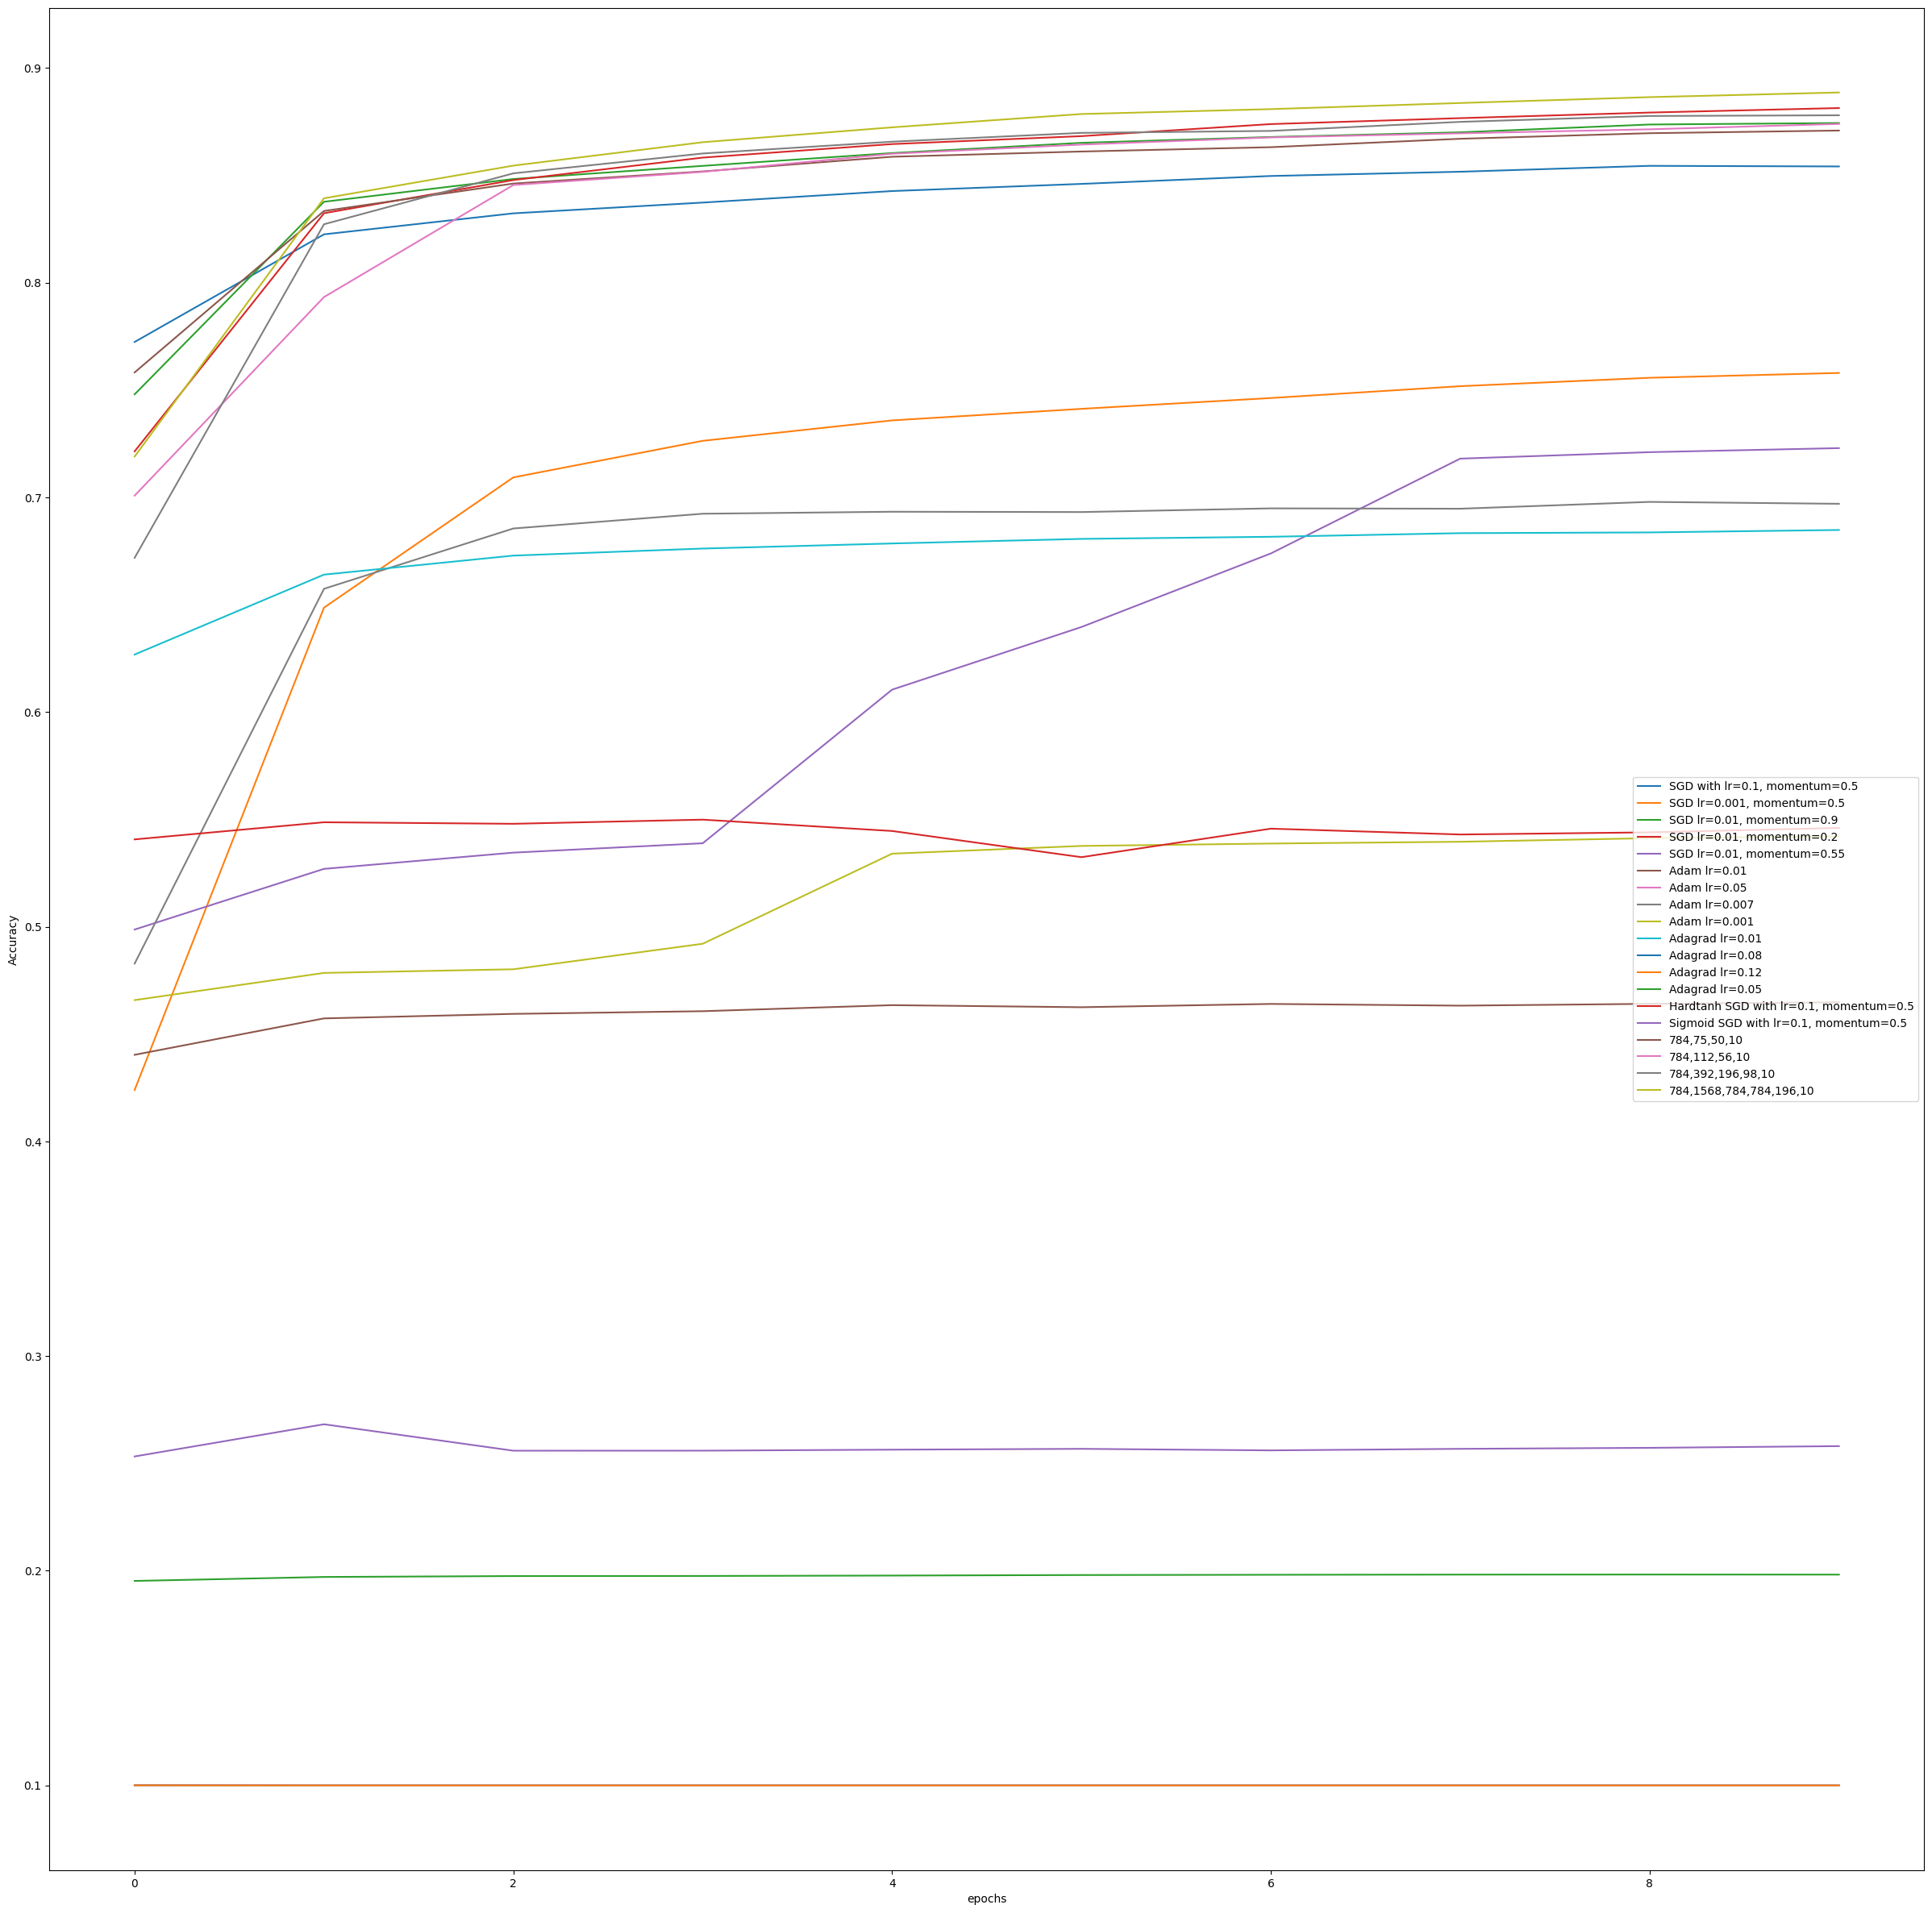

In [29]:
labels = ["SGD with lr=0.1, momentum=0.5", "SGD lr=0.001, momentum=0.5", "SGD lr=0.01, momentum=0.9",
          "SGD lr=0.01, momentum=0.2", "SGD lr=0.01, momentum=0.55",
          "Adam lr=0.01", "Adam lr=0.05", "Adam lr=0.007", "Adam lr=0.001", "Adagrad lr=0.01",
          "Adagrad lr=0.08", "Adagrad lr=0.12", "Adagrad lr=0.05",
          "Hardtanh SGD with lr=0.1, momentum=0.5", "Sigmoid SGD with lr=0.1, momentum=0.5",
	      "784,75,50,10", "784,112,56,10", "784,392,196,98,10", "784,1568,784,784,196,10"]

plt.figure(figsize=(30,30))
for i in range(len(All_Accuracy)):
    plt.plot(All_Accuracy[i], label=labels[i])

plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()